In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

**1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]**

Given: 
$ y_i = f(x_i); $

$ i = \overline{0, n};$ 

$x_i \in [a,b];$

Problem: restore the function $ y_i = f(x_i); $ with the help of cubic splines with defect $ q = 1 $, that is 
$S_3(x) \in C_2[a, b]$


$S_3(x) = \bigcup_{i=0}^{n-1}S_{3,i}(x)$

**2. Formulate the functional and differential compatibility conditions [mathematical formula]**

Functional compatinility conditions: (equality of the spline function to the given unknown function in the grid points at $x_i$ and $x_{i+1}$ )

1) $\delta S_{3,i}(x)|_{x=x_i} = S_{3,i}(x_i) - f(x_i) = 0 $ 

2) $\delta S_{3,i}(x)|_{x=x_i+1} = S_{3,i}(x_{i+1}) - f(x_{i+1}) = 0 $


Differential compatinility conditions: (equality of the second derivatives of the spline function and the given unknown grid function at points $x_i$ and $x_{i+1}$)

3) $\delta S''_{3,i}(x)|_{x=x_i} = S''_{3,i}(x_i) - f''(x_i) = 0 $

4) $\delta S''_{3,i}(x)|_{x=x_i+1} = S''_{3,i}(x_{i+1}) - f''(x_{i+1}) = 0 $

**3. Formulate stitching conditions [mathematical formula]**

$S'_{3, i-1}(x)|_{x=x_i} = S'_{3, i}(x)|_{x=x_i}$

**4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]**

* Functional: provide equality of the constructed function to the unknown one in the grid points. As the constructed function consists of cubic splines, it is differentiable three times in the interval $ [x_i, x_{i+1}] $ for all $i$. However, as we use piecewise global interpolation, we need additional conditions for the merging points.
* Stitching: the function is differentiable and the derivatives in the merging points are equal.
* Differential: there is no discontinuity points in the first derivative and the function doesn't change its curvature abruptly (from convex to concave and vice versa).  

**5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]**

1) $\delta S_{3,i}(x)|_{x=x_i} = S_{3,i}(x_i) - f(x_i) = 0 $ 

2) $\delta S_{3,i}(x)|_{x=x_i+1} = S_{3,i}(x_{i+1}) - f(x_{i+1}) = 0 $

3) $\delta S''_{3,i}(x)|_{x=x_i} = S''_{3,i}(x_i) - f''(x_i) = 0 $

4) $\delta S''_{3,i}(x)|_{x=x_i+1} = S''_{3,i}(x_{i+1}) - f''(x_{i+1}) = 0 $

Spline formula and its derivatives:

$S_{3,i}(x) = a_{0,i} + a_{1,i}(x-x_i) + a_{2,i}(x-x_i)^2 + a_{3,i}(x-x_i)^3$

$ S'_{3,i}(x) = a_{1,i} + 2a_{2,i}(x-x_i) + 3a_{3,i}(x-x_i)^2 $

$ S''_{3,i}(x) = 2a_{2,i} + 6a_{3,i}(x-x_i) $

Let's denote

$h_{i+1} = x_{i+1} - x_i, \Delta f_{i+1} = f_{i+1} - f_i, m_i = f''(x_i), \Delta m_{i+1} = m_{i+1} - m_i$


Substitite the spline formula into the conditions:



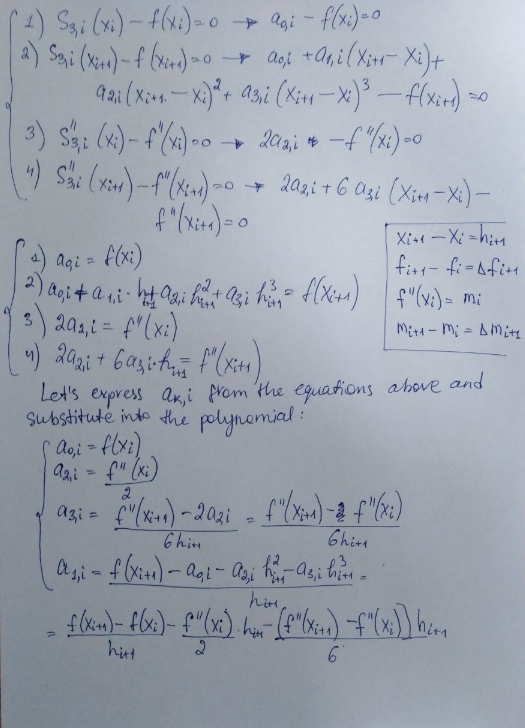

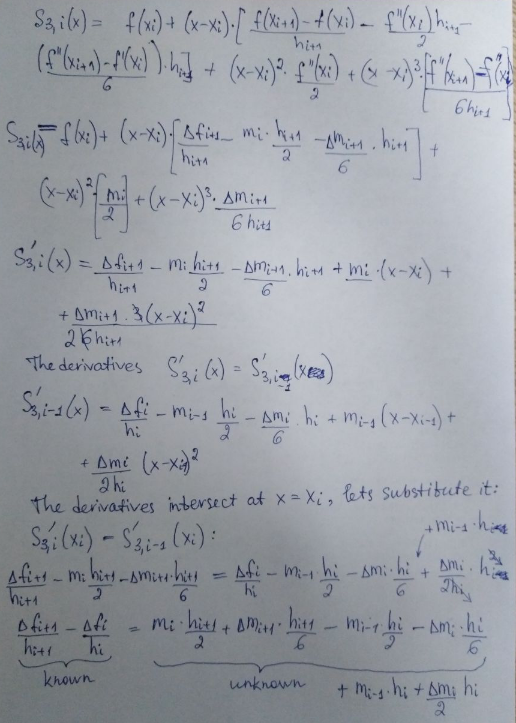

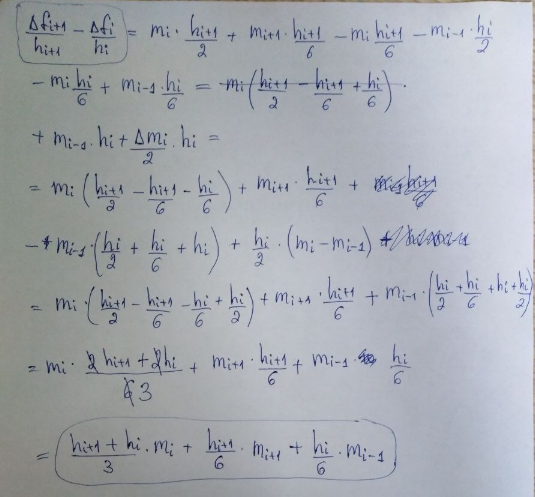

**6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]**

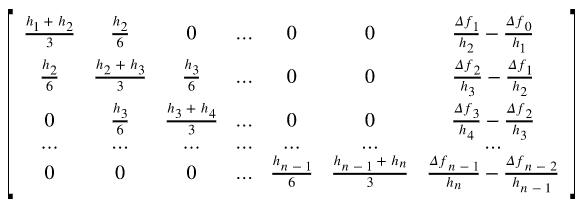

**7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]**

The system is not closed with respect to $m_i (i = 0, n)$ because it lacks two more equations. For the closure we can use different approximations of the derivatives on the ends of the intervals, for example set $m_0 = 0, m_n = 0$ 

**8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]**

It is already tridiagonal

**9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]**

(source: https://en.wikipedia.org/wiki/Tridiagonal_matrix_algorithm)

The derivation of the tridiagonal matrix algorithm is a special case of Gaussian elimination.

Suppose that the unknowns are ${\displaystyle x_{1},\ldots ,x_{n}}x_{1},\ldots ,x_{n}, $ and that the equations to be solved are:
${\displaystyle {\begin{aligned}b_{1}x_{1}+c_{1}x_{2}&=d_{1};&i&=1\\a_{i}x_{i-1}+b_{i}x_{i}+c_{i}x_{i+1}&=d_{i};&i&=2,\ldots ,n-1\\a_{n}x_{n-1}+b_{n}x_{n}&=d_{n};&i&=n.\end{aligned}}}{\begin{aligned}b_{1}x_{1}+c_{1}x_{2}&=d_{1};&i&=1\\a_{i}x_{i-1}+b_{i}x_{i}+c_{i}x_{i+1}&=d_{i};&i&=2,\ldots ,n-1\\a_{n}x_{n-1}+b_{n}x_{n}&=d_{n};&i&=n.\end{aligned}}$


Consider modifying the second $({\displaystyle i=2}i=2)$ equation with the first equation as follows:

${\displaystyle ({\mbox{equation 2}})\cdot b_{1}-({\mbox{equation 1}})\cdot a_{2}}({\mbox{equation 2}})\cdot b_{1}-({\mbox{equation 1}})\cdot a_{2}$
which would give:

${\displaystyle (a_{2}x_{1}+b_{2}x_{2}+c_{2}x_{3})b_{1}-(b_{1}x_{1}+c_{1}x_{2})a_{2}=d_{2}b_{1}-d_{1}a_{2}\,}(a_{2}x_{1}+b_{2}x_{2}+c_{2}x_{3})b_{1}-(b_{1}x_{1}+c_{1}x_{2})a_{2}=d_{2}b_{1}-d_{1}a_{2}\,
{\displaystyle (b_{2}b_{1}-c_{1}a_{2})x_{2}+c_{2}b_{1}x_{3}=d_{2}b_{1}-d_{1}a_{2}\,}(b_{2}b_{1}-c_{1}a_{2})x_{2}+c_{2}b_{1}x_{3}=d_{2}b_{1}-d_{1}a_{2}\,$

where the second equation immediately above is a simplified version of the equation immediately preceding it. The effect is that ${\displaystyle x_{1}}x_{1}$ has been eliminated from the second equation. Using a similar tactic with the modified second equation on the third equation yields:

${\displaystyle (a_{3}x_{2}+b_{3}x_{3}+c_{3}x_{4})(b_{2}b_{1}-c_{1}a_{2})-((b_{2}b_{1}-c_{1}a_{2})x_{2}+c_{2}b_{1}x_{3})a_{3}=d_{3}(b_{2}b_{1}-c_{1}a_{2})-(d_{2}b_{1}-d_{1}a_{2})a_{3}\,}
(a_{3}x_{2}+b_{3}x_{3}+c_{3}x_{4})(b_{2}b_{1}-c_{1}a_{2})-((b_{2}b_{1}-c_{1}a_{2})x_{2}+c_{2}b_{1}x_{3})a_{3}=d_{3}(b_{2}b_{1}-c_{1}a_{2})-(d_{2}b_{1}-d_{1}a_{2})a_{3}\,$


${\displaystyle (b_{3}(b_{2}b_{1}-c_{1}a_{2})-c_{2}b_{1}a_{3})x_{3}+c_{3}(b_{2}b_{1}-c_{1}a_{2})x_{4}=d_{3}(b_{2}b_{1}-c_{1}a_{2})-(d_{2}b_{1}-d_{1}a_{2})a_{3}.\,}(b_{3}(b_{2}b_{1}-c_{1}a_{2})-c_{2}b_{1}a_{3})x_{3}+c_{3}(b_{2}b_{1}-c_{1}a_{2})x_{4}=d_{3}(b_{2}b_{1}-c_{1}a_{2})-(d_{2}b_{1}-d_{1}a_{2})a_{3}.\,$

This time $ x_{2}$ was eliminated. If this procedure is repeated until the $ {\displaystyle n^{th}} $ row; the (modified) ${\displaystyle n^{th}}$  equation will involve only one unknown, ${\displaystyle x_{n}}.$ This may be solved for and then used to solve the$ {\displaystyle (n-1)^{th}}$ equation, and so on until all of the unknowns are solved for.

Clearly, the coefficients on the modified equations get more and more complicated if stated explicitly. By examining the procedure, the modified coefficients (notated with tildes) may instead be defined recursively:


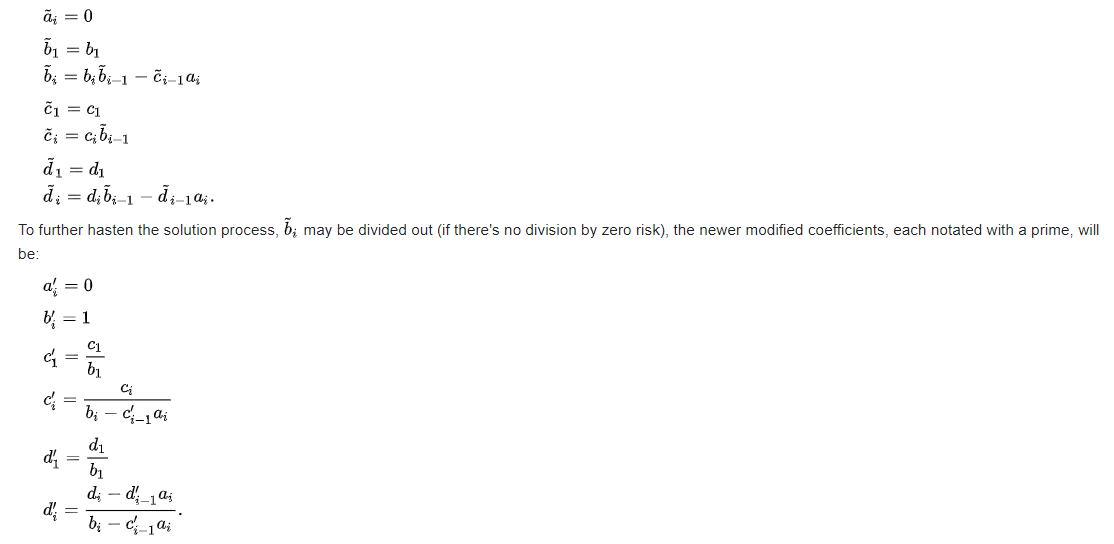

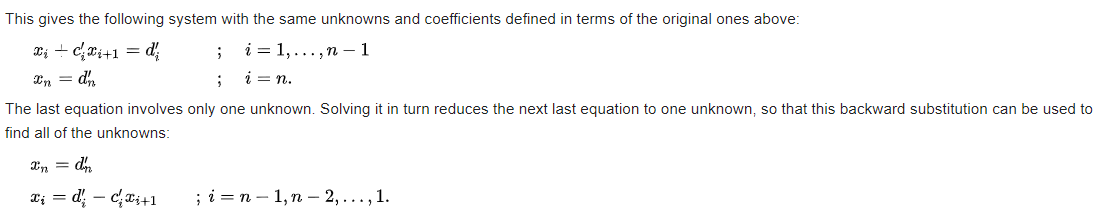

**For our problem:**
    

Forward pass:

$P_i = \frac{h_{i+1}}{- 2(h_{i+1} + h_i) - h_{i}P_{i-1}}, P_1 = -\frac{h_2}{2(h_2+h_1)}$

$Q_i = \frac{\frac{h_i}{6}Q_{i-1} - \frac{\Delta f_i}{h_{i+1}} + \frac{\Delta f_{i-1}}{h_{i}}}{\frac{h_{i+1} + h_i}{3} - \frac{h_i}{6}P_{i-1}}, Q_1 = \frac{3(\frac{\Delta f_1}{h_{2}} - \frac{\Delta f_{0}}{h_{1}})}{h_{2} + h_1}$

Backward pass:

$x_n = \frac{\frac{h_n}{6}Q_{n-1} - \frac{\Delta f_n}{h_{n+1}} + \frac{\Delta f_{n-1}}{h_{n}}}{\frac{h_{n+1} + h_n}{3} - \frac{h_n}{6}P_{n-1}}$

$x_i = \frac{h_{i+1}}{- 2(h_{i+1} + h_i) - h_{i}P_{i-1}} x_{i+1} + \frac{\frac{h_i}{6}Q_{i-1} - \frac{\Delta f_i}{h_{i+1}} + \frac{\Delta f_{i-1}}{h_{i}}}{\frac{h_{i+1} + h_i}{3} - \frac{h_i}{6}P_{i-1}}$

**10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]**

In [ ]:
def compute():
    pass

**11. Derive formula of Cubic Spline method error [Mathematical formulas]**

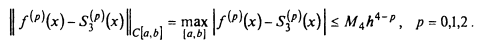

**12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]**

The algorithm is linear

Forward pass: $O(n)$

Backward pass: $O(n)$

Overall: $O(n) = 2 O(n)$, that is $ O(n)$

**Congrats!**